In [2]:
using Pkg
Pkg.activate(".")

  Activating project at `/work/olle/git/learning_td/examples`


In [3]:
using Revise
using Mosek, MosekTools
using Plots
using LearningTeamDecisions


┌ Info: Precompiling LearningTeamDecisions [66b2a6af-af56-4f4d-ae61-1359d12925bb]
└ @ Base loading.jl:1423


In [5]:
X = fill(1, 1,1)
V = [1 0;0 1]
C = fill(1, 2, 1)
H = [1 0 0]'
D = [1 1; 1 0; 0 1]

ms = [1; 1]
ps = [1; 1]
model_factory = Mosek.Optimizer
probleminstance = DecisionProblem(X, V, C, H, D, ms, ps, model_factory)

Setting up a learning team decision problem.
Number of Players: 2
Stepsize parameter λ: 1
Time Horizon: 1000
Spectral-norm bound on gain matrices: 2
Strong convexity lower bound: 2.0000000000000004
Sampling nature...
Learning with gradients...
Total loss: 696.3486822234929
Learning with bandit feedback
Total loss: 3271.8184205891516
Solving for realization-dependent optimum:
Total loss: 551.6997156814238
Computing pseudo optimum
Total loss: 552.5274356537118
Plotting...


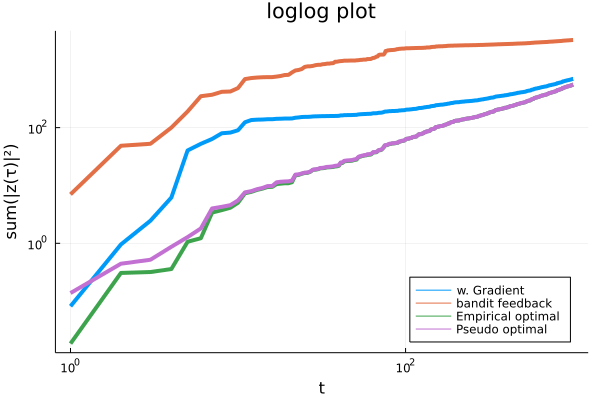

In [10]:
T = 1000
λ = 1
kbound = 2
p = simulate_once(probleminstance, λ, T, kbound)

In [11]:
stepsizes = t -> 1 / λ / t
explorationfn = get_explorationfn(probleminstance)
(lossfn, gradientfn, xs, vs) = sample_nature(probleminstance, T);

In [12]:
K0s = Dict{Symbol,Matrix}(:K1 => fill(randn(), 1,1), :K2 => fill(randn(),1,1))
kbound = 2
(Ks1, losses1) = learning_with_gradients(K0s, kbound, lossfn, gradientfn, stepsizes, T)
(Ks2, losses2) = learning_bandit(K0s, kbound, lossfn, stepsizes, explorationfn, T)
(Ks3, cumlosses3) = empirical_optimum(probleminstance, kbound, xs, vs);
(Ks4, losses4) = pseudo_optimum(probleminstance, lossfn, T);

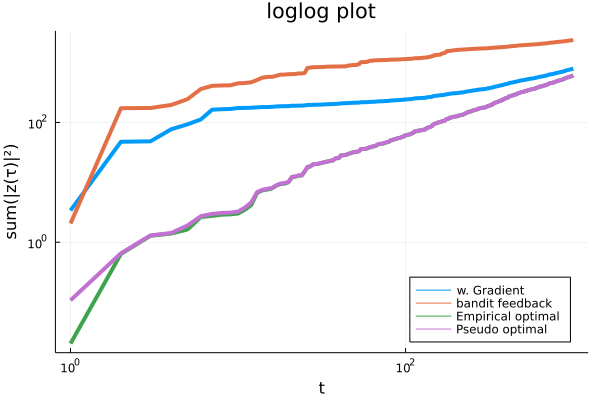

In [13]:
p = plot(1:T,cumsum(losses1), label = "w. Gradient", linewidth = :4)
plot!(1:T,cumsum(losses2), label = "bandit feedback", linewidth = :4)
plot!(1:T,cumlosses3, label = "Empirical optimal", linewidth = :4)
plot!(1:T,cumsum(losses4), label = "Pseudo optimal", linewidth = :4)
plot!(p, yaxis = :log, xaxis = :log, legend = :bottomright, xlabel = "t", ylabel = "sum(|z(τ)|²)")
plot!(p, title="loglog plot")

In [14]:
p = plot(1:T,cumsum(losses1), label = "w. Gradient", linewidth = :4)
plot!(1:T,cumsum(losses2), label = "bandit feedback", linewidth = :4)
plot!(1:T,cumlosses3, label = "Empirical optimal", linewidth = :4)
plot!(1:T,cumsum(losses4), label = "Pseudo optimal", linewidth = :4)
plot!(p, yaxis = :log,, legend = :bottomright, xlabel = "t", ylabel = "sum(|z(τ)|²)")
plot!(p, title="linlog plot")

LoadError: syntax: unexpected ","

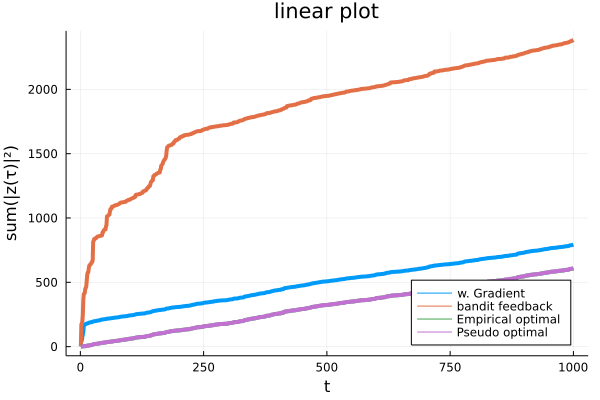

In [15]:
p = plot(1:T,cumsum(losses1), label = "w. Gradient", linewidth = :4)
plot!(1:T,cumsum(losses2), label = "bandit feedback", linewidth = :4)
plot!(1:T,cumlosses3, label = "Empirical optimal", linewidth = :4)
plot!(1:T,cumsum(losses4), label = "Pseudo optimal", linewidth = :4)
plot!(p, legend = :bottomright, xlabel = "t", ylabel = "sum(|z(τ)|²)")
plot!(p, title="linear plot")